In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

# Caso Categórico



**CASO:** Se está evaluando la compra de un auto y para eso se ha realizado una encuesta a clientes potenciales, las principales características que se han identifcado son :

    - Buying: Precio de compra.
    - Maintenance: Precio de mantenimiento.
    - Doors: Cantidad de puertas.
    - Person: Capacidad del auto.
    - Lug Boot: Tamaño de la maletera.
    - Safety: Seguridad.
    - Class: Aceptabilidad de compra.

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = "D:\Briam\Clases\Python For Data Science\Data".replace("\\","/")
name = "Compra_Auto.txt"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ";", header = 0)
df.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df_pre = df.copy()

1. Vemos la distribución de nuestro target

Instancias del atributo class: 
class
unacc    69.428571
acc      22.285714
good      4.285714
vgood     4.000000
Name: count, dtype: float64


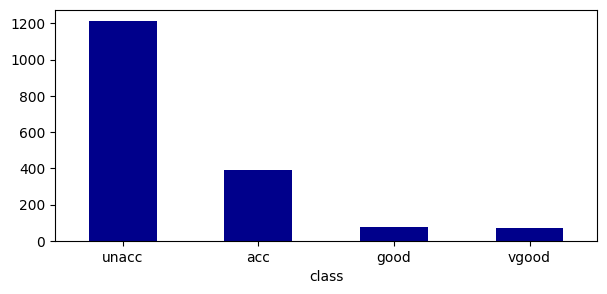

In [ ]:
# Número de clases de la variable objetivo
print("Instancias del atributo class: ")
print(pd.value_counts(df_pre["class"])/len(df_pre)*100)
plt.figure(figsize=(7,3))
pd.value_counts(df_pre["class"]).plot(kind = "bar", rot = 0, color = "Darkblue")
plt.show()

Para clases poco representativas que se relacionen, las agrupamos para tratarlas en conjunto como uno solo y obtenemos mayor información para poder concluir

In [ ]:
df_pre["class"] = np.where(df_pre["class"] == "good", "acc", df_pre["class"])
df_pre["class"] = np.where(df_pre["class"] == "vgood","acc", df_pre["class"])

Instancias del atributo class: 
class
unacc    69.428571
acc      30.571429
Name: count, dtype: float64


<Axes: xlabel='class'>

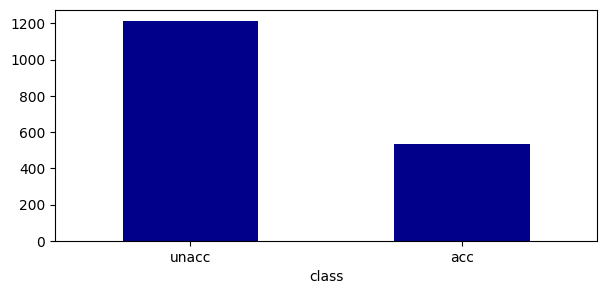

In [ ]:
# Número de clases de la variable objetivo
print("Instancias del atributo class: ")
print(pd.value_counts(df_pre["class"])/len(df_pre)*100)
plt.figure(figsize=(7,3))
pd.value_counts(df_pre["class"]).plot(kind = "bar", rot = 0, color = "Darkblue")

<Figure size 700x300 with 0 Axes>

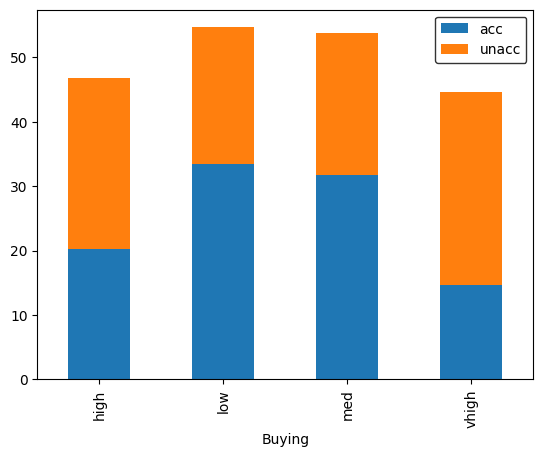

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["Buying"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

<Figure size 700x300 with 0 Axes>

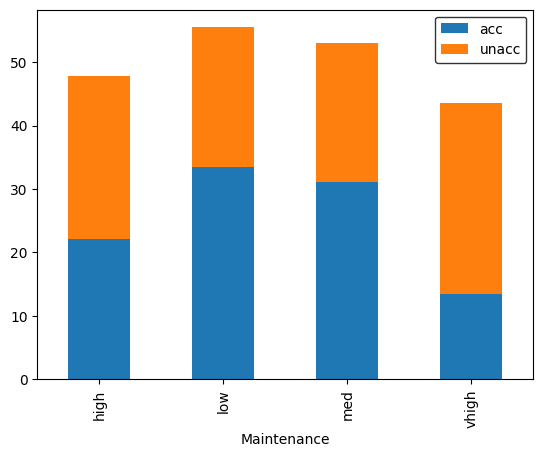

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["Maintenance"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

<Figure size 700x300 with 0 Axes>

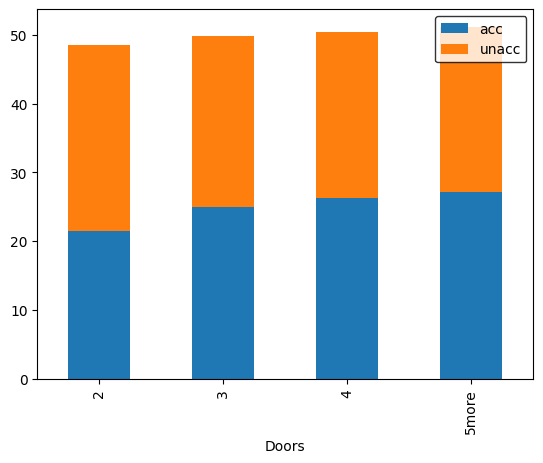

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["Doors"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

<Figure size 700x300 with 0 Axes>

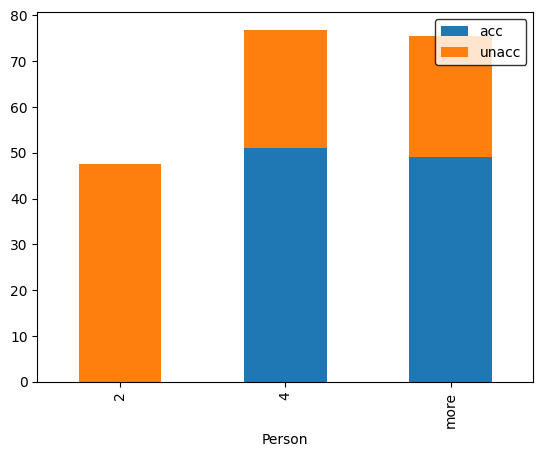

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["Person"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

<Figure size 700x300 with 0 Axes>

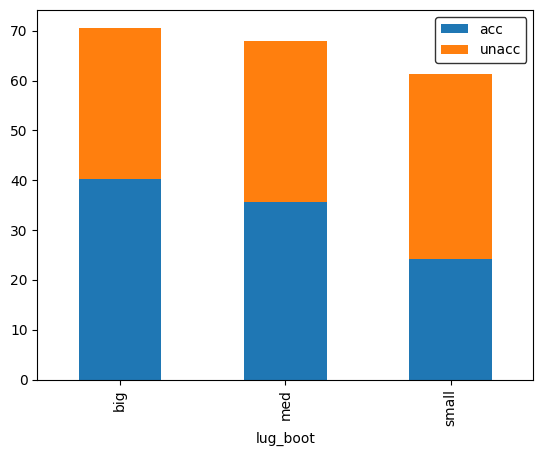

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["lug_boot"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

<Figure size 700x300 with 0 Axes>

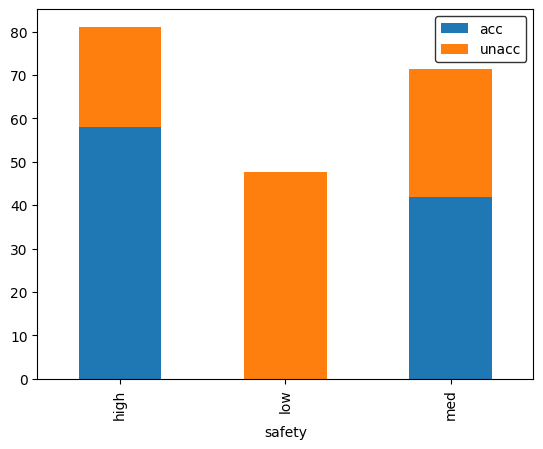

In [ ]:
plt.figure(figsize=(7,3))
pd.crosstab(df_pre["safety"],df_pre["class"]).apply(lambda r: r/r.sum()*100, axis = 0).plot(kind = "bar", stacked = True)
plt.legend(loc = "upper right", edgecolor = "black")
plt.show()

**Conclusión** Nuestros clientes potenciales están buscando en un auto:

1. Precio económico.
2. Costo de mantenimiento bajo.
3. Capacidad para 4 o más personas.
4. Tamaño de maletera normal.
5. Seguridad.

# Caso numérico

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = "D:\Briam\Clases\Python For Data Science\Data".replace("\\","/")
name = "MarketingDirecto.csv"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ";", header = 0,
                dtype = {
                    "Edad":str,
                    "Genero":str,
                    "Vivienda":str,
                    "Ecivil":str,
                    "Ubicacion":str,
                    "Salario":float,
                    "Hijos":int,
                    "Historial":str,
                    "Catalogos":int,
                    "Monto":float
                })
df.head()

,Captura,Ciudad,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,REPORTE MKT,NaN,Adulta,Femenino,Propia,Soltero,Lejos,47500.0,0,Alto,6,755.0
1,REPORTE MKT,NaN,Media,Masculino,Alquilada,Soltero,Cerca,63600.0,0,Alto,6,1318.0
2,REPORTE MKT,NaN,Joven,Femenino,Alquilada,Soltero,Cerca,13500.0,0,Bajo,18,296.0
3,REPORTE MKT,NaN,Media,Masculino,Propia,Casado,Cerca,85600.0,1,Alto,18,2436.0
4,REPORTE MKT,NaN,Media,Femenino,Propia,Soltero,Cerca,68400.0,0,Alto,12,1304.0


In [ ]:
df_pre = df.copy()

In [ ]:
df_pre = df_pre.drop(columns = ["Captura","Ciudad"])

In [ ]:
df_pre = df_pre[
    (df_pre["Salario"]>=0) &
    (df_pre["Hijos"]>=0) &
    (df_pre["Hijos"]<10) &
    (df_pre["Catalogos"]>=0) &
    (df_pre["Monto"]>=0)]

In [ ]:
df_pre = df_pre[df_pre.duplicated() == False]
df_pre.reset_index(drop = True)
df_pre.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500.0,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600.0,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500.0,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600.0,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400.0,0,Alto,12,1304.0


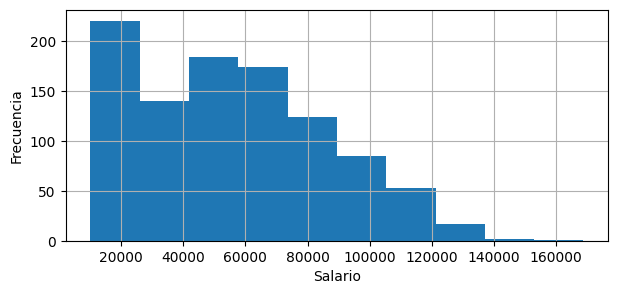

In [ ]:
# Graficamos el histograma de la variable Salario
plt.figure(figsize=(7,3))
df_pre["Salario"].hist()
plt.xlabel("Salario")
plt.ylabel("Frecuencia")
plt.show()

<Figure size 700x300 with 0 Axes>

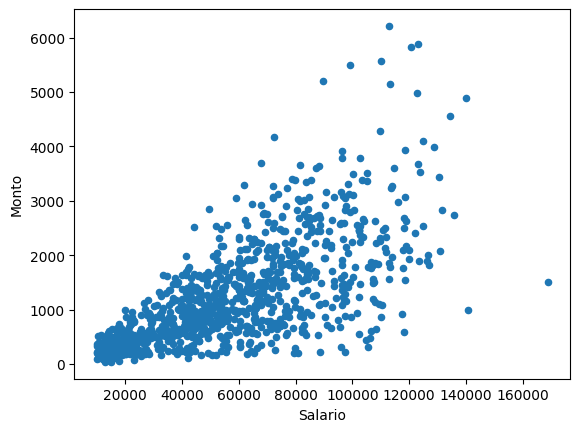

In [ ]:
# Graficamos el scatterplot de la variable Salario y Monto
plt.figure(figsize = (7,3))
df_pre.plot.scatter(x="Salario", y="Monto")
plt.xlabel("Salario")
plt.ylabel("Monto")
plt.show()

<Figure size 700x300 with 0 Axes>

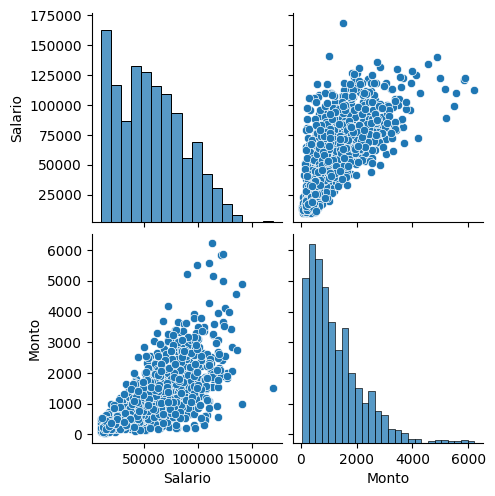

In [ ]:
# Analizamos de forma bivariada las variables Salario y Monto
plt.figure(figsize = (7,3))
sns.pairplot(df_pre[["Salario","Monto"]],height=2.5)
plt.show()

In [ ]:
mat_corr = df_pre.select_dtypes(include = ["number"]).corr()
mat_corr

,Salario,Hijos,Catalogos,Monto
Salario,1.000000,0.049663,0.183551,0.699596
Hijos,0.049663,1.000000,-0.113455,-0.222308
Catalogos,0.183551,-0.113455,1.000000,0.472650
Monto,0.699596,-0.222308,0.472650,1.000000


In [ ]:
range()

[0, 1, 2, 3]

<Figure size 700x300 with 0 Axes>

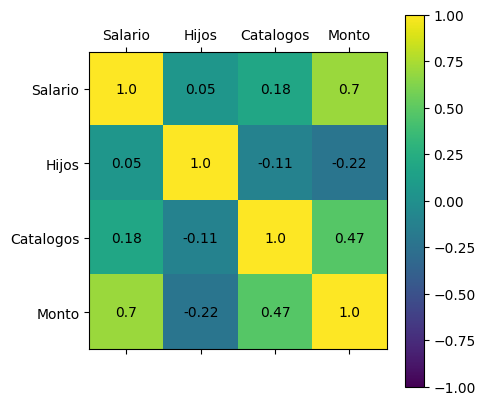

In [ ]:
plt.figure(figsize = (7,3))
plt.matshow(mat_corr, cmap = "viridis", vmin = -1, vmax = 1)
plt.xticks(range(4), mat_corr.columns)
plt.yticks(range(4), mat_corr.columns)
for i in range(len(mat_corr.columns)):
    for j in range(len(mat_corr.columns)):
        plt.text(i,j,round(mat_corr.iloc[i,j],2), ha = "center",va = "center")
plt.colorbar()
plt.show()


In [ ]:
mat_corr.style.background_gradient (cmap = 'viridis')

,Salario,Hijos,Catalogos,Monto
Salario,1.000000,0.049663,0.183551,0.699596
Hijos,0.049663,1.000000,-0.113455,-0.222308
Catalogos,0.183551,-0.113455,1.000000,0.472650
Monto,0.699596,-0.222308,0.472650,1.000000
